In [1]:
import numpy as np
import pyvista as pv
import torch
import matplotlib.pyplot as plt

In [2]:
def slide2D_fractionZ(film, start, end, direction, fraction, value):
    if fraction == '+':
        if direction == 'y':
            slit = np.linspace(0, np.abs(end[2] - start[2]), np.abs(end[1] - start[1]))
            fraction = np.abs(int(slit[0]-slit[1]))
            print('y', slit)
            print('fraction', fraction)
            for i in range(np.abs(end[1] - start[1])):
                if end[1] > start[1]:
                    film[start[0]:end[0], start[1] + i, start[2]:start[2] + int(slit[i])] = value
                    for j in range(fraction):
                        film[start[0]:end[0], start[1] + i,start[2]+int(slit[i])+j] = 1/(fraction+1)*(fraction-j)
                elif end[1] < start[1]:
                    film[start[0]:end[0], start[1] - i, start[2]:start[2] + int(slit[i])] = value
                    for j in range(fraction):
                        film[start[0]:end[0], start[1] - i,start[2]+int(slit[i])+j] = 1/(fraction+1)*(fraction-j)
        elif direction == 'x':
            slit = np.linspace(0, np.abs(end[2] - start[2]), np.abs(end[0] - start[0]))
            fraction = np.abs(int(slit[0]-slit[1]))
            print('x', slit)
            print('fraction', fraction)
            for i in range(np.abs(end[2] - start[2])):
                if end[0] > start[0]:
                    film[start[0] + i, start[1]:end[1], start[2]:start[2] + int(slit[i])] = value
                    for j in range(fraction):
                        film[start[0] + i, start[1]:end[1], start[2]+int(slit[i])+j] = 1/(fraction+1)*(fraction-j)
                elif end[0] < start[0]:
                    film[start[0] - i, start[1]:end[1], start[2]:start[2] + int(slit[i])] = value
                    for j in range(fraction):
                        film[start[0] - i, start[1]:end[1], start[2]+int(slit[i])+j] = 1/(fraction+1)*(fraction-j)
    elif fraction == '-':
        if direction == 'y':
            slit = np.linspace(0, np.abs(end[2] - start[2]), np.abs(end[1] - start[1]))
            fraction = np.abs(int(slit[0]-slit[1]))
            print('y', slit)
            print('fraction', fraction)
            for i in range(np.abs(end[1] - start[1])):
                if end[1] > start[1]:
                    film[start[0]:end[0], start[1] + i, start[2] - int(slit[i]):start[2]+1] = value
                    for j in range(fraction):
                        film[start[0]:end[0], start[1] + i,start[2]-int(slit[i])-j] = 1/(fraction+1)*(fraction-j)
                elif end[1] < start[1]:
                    film[start[0]:end[0], start[1] - i, start[2] - int(slit[i]):start[2]+1] = value
                    for j in range(fraction):
                        film[start[0]:end[0], start[1] - i,start[2]-int(slit[i])-j] = 1/(fraction+1)*(fraction-j)
        elif direction == 'x':
            slit = np.linspace(0, np.abs(end[2] - start[2]), np.abs(end[0] - start[0]))
            fraction = np.abs(int(slit[0]-slit[1]))
            print('x', slit)
            print('fraction', fraction)
            for i in range(np.abs(end[2] - start[2])):
                if end[0] > start[0]:
                    film[start[0] + i, start[1]:end[1], start[2] - int(slit[i]):start[2]+1] = value
                    for j in range(fraction):
                        film[start[0] + i, start[1]:end[1], start[2] - int(slit[i]):start[2]] = 1/(fraction+1)*(fraction-j)
                elif end[0] < start[0]:
                    film[start[0] - i, start[1]:end[1], start[2] - int(slit[i]):start[2]+1] = value
                    for j in range(fraction):
                        film[start[0] - i, start[1]:end[1], start[2] - int(slit[i]):start[2]] = 1/(fraction+1)*(fraction-j)
    return film

In [3]:
film = np.zeros((70, 200, 150))

bottom = 10
# film[:, :, 0:bottom] = 10 # bottom

height = 80
left_side = 75
right_side = 75
film[:, left_side+6:200-left_side-6, 0:height] = 10
film[:, :19, 0:height] = 10
film[:, 181:, 0:height] = 10

film = slide2D_fractionZ(film=film, start=[0, left_side, bottom], end=[70, left_side+6, height], direction='y', fraction='+', value=10)
film = slide2D_fractionZ(film=film, start=[0, 200-left_side-1, bottom], end=[70, 200-left_side-6-1, height], direction='y', fraction='+', value=10)
film = slide2D_fractionZ(film=film, start=[0, 19+6-1, bottom], end=[70, 19-1, height], direction='y', fraction='+', value=10)
film = slide2D_fractionZ(film=film, start=[0, 181-6, bottom], end=[70, 181, height], direction='y', fraction='+', value=10)

# film[:, 80:121, 0:31] = 10

film[:, :, 0:bottom] = 10 # bottom
film[:, :, height:] = 0 # bottom

y [ 0. 14. 28. 42. 56. 70.]
fraction 14
y [ 0. 14. 28. 42. 56. 70.]
fraction 14
y [ 0. 14. 28. 42. 56. 70.]
fraction 14
y [ 0. 14. 28. 42. 56. 70.]
fraction 14


In [ ]:
geom = pv.Box()

substrute = torch.Tensor(film==10).to_sparse()
substrute = substrute.indices().numpy().T

cyan = torch.Tensor(np.logical_and(film[:, :, :]!=10, film[:, :, :]!=0)).to_sparse()
cyan = cyan.indices().numpy().T

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

cyanmesh = pv.PolyData(cyan)
cyanmesh["radius"] = np.ones(cyan.shape[0])*0.5
# Progress bar is a new feature on master branch
cyanglyphed = cyanmesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)
p = pv.Plotter()
p.add_mesh(subglyphed, color='gray')
# p.add_mesh(cyanglyphed, color='cyan')
p.enable_eye_dome_lighting()
p.show()


In [ ]:
film.shape

In [4]:
etchfilm = np.load('./test_depoFloat.npy')
center = 100

In [5]:
etchfilm = np.zeros((70, 200, 150, 2))
etchfilm[:, :, :, 0] = film
# etchfilm[:, :, :, 1] = film

center = 100


In [5]:
import Multi_Species_bosch_etching_countByReaction_mirror_func_redepo

In [6]:
from scipy import interpolate

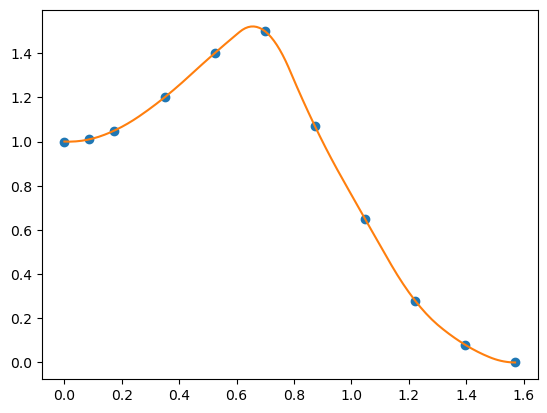

In [7]:
yield_hist = np.array([[1.0, 1.01, 1.05,  1.2,  1.4,  1.5, 1.07, 0.65, 0.28, 0.08,  0, \
                        0.08, 0.28,0.65,  1.07, 1.5, 1.4, 1.2, 1.05, 1.01, 1.0 ], \
                        [  0,  5,   10,   20,   30,   40,   50,   60,   70,   80, 90, \
                          100, 110, 120, 130, 140, 150, 160, 170, 175, 180]])
yield_hist[1] *= np.pi/180
yield_func = interpolate.interp1d(yield_hist[1], yield_hist[0], kind='quadratic')

xnew = np.arange(0, np.pi/2, 0.01)
# xnew = np.array([])
ynew = yield_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(yield_hist[1, :11], yield_hist[0, :11], 'o', xnew, ynew, '-')
plt.show()

In [8]:
logname = 'Multi_species_benchmark_1023_redepo'
inputMethod='bunch'
depo_or_etching='depo'
etchingPoint = np.array([center, center, bottom-30])
depoPoint = np.array([center, center, bottom-30])
density = 10
center_with_direction=np.array([[int(etchfilm.shape[0]/2),int(etchfilm.shape[1]/2),150]])
range3D=np.array([[0, etchfilm.shape[0], 0, etchfilm.shape[1], 0, etchfilm.shape[2]]])
InOrOut=[1]
# yield_hist=np.array([None])
yield_hist = yield_hist
maskTop=40, 
maskBottom=98, 
maskStep=10, 
maskCenter=[int(etchfilm.shape[0]/2), int(etchfilm.shape[1]/2)]
backup=False
mirrorGap=5
reaction_type=False
param = [1.6, -0.7]
n=1
celllength=1e-5
kdtreeN=5
filmKDTree=np.array([[2, 0, 1], [3, 0, -1]]) # 1 for depo -1 for etching
# filmKDTree=np.array([[2, 1], [3, 1]])
weightDepo=0.2
weightEtching = 0.2
tstep=1e-5
substrateTop=bottom
posGeneratorType='top'
testEtch = Multi_Species_bosch_etching_countByReaction_mirror_func_redepo.etching(
                    inputMethod, depo_or_etching, 
                    etchingPoint,depoPoint,
                    density, center_with_direction, 
                    range3D, InOrOut, yield_hist,
                    maskTop, maskBottom, maskStep, maskCenter,backup, 
                    mirrorGap,
                    reaction_type, param,n,
                    celllength, kdtreeN, filmKDTree,weightDepo,weightEtching, tstep,
                    substrateTop,posGeneratorType, logname)

In [9]:
react_table = np.array([[[0.900, 0, 1], [0.900, 0, 1]],
                        [[1.00, -1, 0], [1.00, 0, -1]]])

react_type_table = np.array([[2, 0],
                             [3, 0]])

In [10]:
Multi_Species_bosch_etching_countByReaction_mirror_func_redepo.react_table = react_table
Multi_Species_bosch_etching_countByReaction_mirror_func_redepo.react_type_table = react_type_table

In [ ]:
cicle = 100
celllength=1e-5
parcel = np.array([[95*celllength, 95*celllength, 159*celllength, 0, 0, 1, 95, 95, 159, 0]])
step1 = testEtch.inputParticle(etchfilm, parcel, 'maxwell', 0, int(5e4), int(2e7), int(5e6),2, 10, 100)
# np.save('./bosch_data_1015_test/bosch_sf_step_sf01', etchfilm)

In [11]:
cicle = 100
celllength=1e-5
parcel = np.array([[95*celllength, 95*celllength, 159*celllength, 0, 0, 1, 95, 95, 159, 0]])
step1 = testEtch.inputParticle(etchfilm, parcel, 'updown', 1, int(5e3), int(1e5), int(1e6),2, 10, 100)

(80, 210, 150)


particle input:   0%|                                                     | 0.00/100 [00:00<?, ?B/s]d:\ysy\etching\surface_normalize_etching_depo.py:235: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(dot_products)
particle input:  13%|█████▊                                       | 13.0/100 [25:10<2:48:30, 116s/B]


In [ ]:
testEtch.parcel

In [ ]:
testEtch.parcel.shape

In [ ]:
testEtch.parcel[0]

In [12]:
get0 = testEtch.parcel[testEtch.parcel[:, -1] == 0]

In [ ]:
get0.shape

In [ ]:
get0[0]

In [ ]:
np.sum(testEtch.parcel[:, -1] == 0)

In [ ]:
get0.shape

In [ ]:
testEtch.planes

In [11]:
pos1e4_data = testEtch.planes

In [ ]:
etchfilm[40, 71, :,0]

In [ ]:
np.any(etchfilm[:, :, :,1])

In [ ]:
point_cloud = pv.PolyData(pos1e4_data[:, 3:6])
vectors = pos1e4_data[:, :3]

point_cloud['vectors'] = vectors
arrows = point_cloud.glyph(
    orient='vectors',
    scale=10000,
    factor=3,
)

# Display the arrowscyan


plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='cyan', point_size=5.0, render_points_as_spheres=True)
# plotter.add_mesh(sphere, show_edges=True, opacity=0.5, color="w")
plotter.add_mesh(arrows, color='lightblue')
# # plotter.add_point_labels([point_cloud.center,], ['Center',],
# #                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

In [13]:
geom = pv.Box()

substrute = torch.Tensor(np.logical_and(etchfilm[:, :, :,0]>0, etchfilm[:, :, :,0]<1)).to_sparse()
substrute = substrute.indices().numpy().T

# cyan = torch.Tensor(np.logical_and(etchfilm[:, :, :,0]!=0, film[:, :, :]!=10)).to_sparse()
cyan = torch.Tensor(etchfilm[:, :, :,0]>=9).to_sparse()
cyan = cyan.indices().numpy().T

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

cyanmesh = pv.PolyData(cyan)
cyanmesh["radius"] = np.ones(cyan.shape[0])*0.5
# Progress bar is a new feature on master branch
cyanglyphed = cyanmesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)
p = pv.Plotter()
p.add_mesh(subglyphed, color='gray')
p.add_mesh(cyanglyphed, color='cyan')
p.enable_eye_dome_lighting()
p.show()

c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\filters\data_set.py:2386: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:60508/index.html?ui=P_0x20000b9adb0_1&reconnect=auto" class="pyvis…

In [ ]:
geom = pv.Box()

substrute = torch.Tensor(np.logical_and(etchfilm[:, :, :,0]!=0, etchfilm[:, :, :,0]!=10)).to_sparse()
substrute = substrute.indices().numpy().T

# cyan = torch.Tensor(np.logical_and(etchfilm[:, :, :,0]!=0, film[:, :, :]!=10)).to_sparse()
cyan = torch.Tensor(etchfilm[:, :, :,0]==10).to_sparse()
cyan = cyan.indices().numpy().T

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

cyanmesh = pv.PolyData(cyan)
cyanmesh["radius"] = np.ones(cyan.shape[0])*0.5
# Progress bar is a new feature on master branch
cyanglyphed = cyanmesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)
p = pv.Plotter()
p.add_mesh(subglyphed, color='gray')
p.add_mesh(cyanglyphed, color='cyan')
p.enable_eye_dome_lighting()
p.show()

In [ ]:
geom = pv.Box()

beforeEtch = np.load('./test_depoFloat.npy')

substrute = torch.Tensor(film[:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T

red_indice = np.logical_and(beforeEtch[:, :, :,0]==10, etchfilm[:, :, :, 0]!=10)
# red_indice |= etchfilm[:, :, :,0] != 10

red = torch.Tensor(red_indice).to_sparse()
red = red.indices().numpy().T

# cyan = torch.Tensor(cyan_indice).to_sparse()
cyan = torch.Tensor(np.logical_and(etchfilm[:, :, :,0]==10, film[:, :, :]!=10)).to_sparse()
# cyan = torch.Tensor(etchfilm[:, :, :,0]==10).to_sparse()
cyan = cyan.indices().numpy().T

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

cyanmesh = pv.PolyData(cyan)
cyanmesh["radius"] = np.ones(cyan.shape[0])*0.5

redmesh = pv.PolyData(red)
redmesh["radius"] = np.ones(red.shape[0])*0.5
# Progress bar is a new feature on master branch
cyanglyphed = cyanmesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)
redglyphed = redmesh.glyph(scale="radius", geom=geom) # progress_bar=True)
p = pv.Plotter()
p.add_mesh(subglyphed, color='gray', opacity=0.1)
# p.add_mesh(cyanglyphed, color='cyan')
p.add_mesh(redglyphed, color='red')
p.enable_eye_dome_lighting()
p.show()

In [15]:
np.save('./test_depoFloat', etchfilm)

In [20]:
deposit0 = np.load('./ID242/cvd_void_subDepo_thk100.npy')

In [ ]:
deposit0[20, 50, 30:]

In [12]:
from surface_normalize_etching_depo import surface_normal

In [15]:
inputMethod='bunch'
depo_or_etching='depo'
etchingPoint = np.array([center, center, bottom-30])
depoPoint = np.array([center, center, bottom-30])
density = 10
center_with_direction=np.array([[int(etchfilm.shape[0]/2),int(etchfilm.shape[1]/2),150]])
range3D=np.array([[0, etchfilm.shape[0], 0, etchfilm.shape[1], 0, etchfilm.shape[2]]])
InOrOut=[1]
yield_hist=np.array([None])
maskTop=40, 
maskBottom=98, 
maskStep=10, 
maskCenter=[int(etchfilm.shape[0]/2), int(etchfilm.shape[1]/2)]
backup=False
mirrorGap=5
reaction_type=False
param = [1.6, -0.7]
n=1
celllength=1e-5
kdtreeN=5
filmKDTree=np.array([[2, 0], [3, 0]])
# filmKDTree=np.array([[2, 1], [3, 1]])
weight=0.2
tstep=1e-5
substrateTop=bottom
posGeneratorType='top'

In [18]:
surface = surface_normal(center_with_direction, range3D, InOrOut,celllength, tstep, yield_hist,\
                        maskTop, maskBottom, maskStep, maskCenter, backup, filmDensity=10)

In [ ]:
self.planes = self.get_pointcloud(sumFilm)